## Eksplorasi COVID19 di Indonesia

Notebook ini merupakan eksplorasi pada data covid19 di Indonesia. Data diperoleh dari `https://data.covid19.go.id/public/api/update.json` dan di akses pada tanggal 13 November 2020, pukul 16.30. Eksplorasi hanya dilakukan dengan memvisualisasikan data. Notebook ini hanya eksplorasi pribadi, dimana saya juga sedang belajar menggunakan python untuk data analisis.

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
resp = requests.get('https://data.covid19.go.id/public/api/update.json')

In [3]:
resp

<Response [200]>

In [4]:
cov_id_raw = resp.json()

In [5]:
print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']

Length of cov_id_raw : 2.
Komponen cov_id_raw : dict_keys(['data', 'update']).


In [6]:
cov_id_update = cov_id_raw['update']
cov_id_update.keys()

dict_keys(['penambahan', 'harian', 'total'])

In [7]:
cov_id_update['total']

{'jumlah_positif': 457735,
 'jumlah_dirawat': 57604,
 'jumlah_sembuh': 385094,
 'jumlah_meninggal': 15037}

In [9]:
cov_id_update['harian']

[{'key_as_string': '2020-03-02T00:00:00.000Z',
  'key': 1583107200000,
  'doc_count': 1,
  'jumlah_meninggal': {'value': 0},
  'jumlah_sembuh': {'value': 0},
  'jumlah_positif': {'value': 2},
  'jumlah_dirawat': {'value': 2},
  'jumlah_positif_kum': {'value': 2},
  'jumlah_sembuh_kum': {'value': 0},
  'jumlah_meninggal_kum': {'value': 0},
  'jumlah_dirawat_kum': {'value': 2}},
 {'key_as_string': '2020-03-03T00:00:00.000Z',
  'key': 1583193600000,
  'doc_count': 1,
  'jumlah_meninggal': {'value': 0},
  'jumlah_sembuh': {'value': 0},
  'jumlah_positif': {'value': 0},
  'jumlah_dirawat': {'value': 0},
  'jumlah_positif_kum': {'value': 2},
  'jumlah_sembuh_kum': {'value': 0},
  'jumlah_meninggal_kum': {'value': 0},
  'jumlah_dirawat_kum': {'value': 2}},
 {'key_as_string': '2020-03-04T00:00:00.000Z',
  'key': 1583280000000,
  'doc_count': 1,
  'jumlah_meninggal': {'value': 0},
  'jumlah_sembuh': {'value': 0},
  'jumlah_positif': {'value': 0},
  'jumlah_dirawat': {'value': 0},
  'jumlah_posi

In [10]:
df = pd.DataFrame(cov_id_update['harian'])

In [11]:
df.tail()

,key_as_string,key,doc_count,jumlah_meninggal,jumlah_sembuh,jumlah_positif,jumlah_dirawat,jumlah_positif_kum,jumlah_sembuh_kum,jumlah_meninggal_kum,jumlah_dirawat_kum
252,2020-11-09T00:00:00.000Z,1604880000000,1,{'value': 75},{'value': 3968},{'value': 2853},{'value': -1190},{'value': 440569},{'value': 372266},{'value': 14689},{'value': 53614}
253,2020-11-10T00:00:00.000Z,1604966400000,1,{'value': 72},{'value': 3475},{'value': 3779},{'value': 232},{'value': 444348},{'value': 375741},{'value': 14761},{'value': 53846}
254,2020-11-11T00:00:00.000Z,1605052800000,1,{'value': 75},{'value': 3241},{'value': 3770},{'value': 454},{'value': 448118},{'value': 378982},{'value': 14836},{'value': 54300}
255,2020-11-12T00:00:00.000Z,1605139200000,1,{'value': 97},{'value': 3102},{'value': 4173},{'value': 974},{'value': 452291},{'value': 382084},{'value': 14933},{'value': 55274}
256,2020-11-13T00:00:00.000Z,1605225600000,1,{'value': 104},{'value': 3010},{'value': 5444},{'value': 2330},{'value': 457735},{'value': 385094},{'value': 15037},{'value': 57604}


In [12]:
columns = df.columns
columns

Index(['key_as_string', 'key', 'doc_count', 'jumlah_meninggal',
       'jumlah_sembuh', 'jumlah_positif', 'jumlah_dirawat',
       'jumlah_positif_kum', 'jumlah_sembuh_kum', 'jumlah_meninggal_kum',
       'jumlah_dirawat_kum'],
      dtype='object')

In [13]:
columns = columns.drop(['key_as_string', 'key', 'doc_count'])

In [14]:
for column in columns:
    df[column] = df[column].apply(pd.Series)

In [15]:
df.drop(['key_as_string','doc_count'], axis=1, inplace=True)

In [16]:
df.rename(columns={"key" : "tanggal"}, inplace=True)

In [17]:
df.head()

,tanggal,jumlah_meninggal,jumlah_sembuh,jumlah_positif,jumlah_dirawat,jumlah_positif_kum,jumlah_sembuh_kum,jumlah_meninggal_kum,jumlah_dirawat_kum
0,1583107200000,0,0,2,2,2,0,0,2
1,1583193600000,0,0,0,0,2,0,0,2
2,1583280000000,0,0,0,0,2,0,0,2
3,1583366400000,0,0,0,0,2,0,0,2
4,1583452800000,0,0,2,2,4,0,0,4


In [18]:
df['tanggal'] = pd.to_datetime(df['tanggal']*1e6, unit='ns')

In [19]:
df.head()

,tanggal,jumlah_meninggal,jumlah_sembuh,jumlah_positif,jumlah_dirawat,jumlah_positif_kum,jumlah_sembuh_kum,jumlah_meninggal_kum,jumlah_dirawat_kum
0,2020-03-02,0,0,2,2,2,0,0,2
1,2020-03-03,0,0,0,0,2,0,0,2
2,2020-03-04,0,0,0,0,2,0,0,2
3,2020-03-05,0,0,0,0,2,0,0,2
4,2020-03-06,0,0,2,2,4,0,0,4


In [20]:
df = df[['tanggal', 'jumlah_positif', 'jumlah_meninggal', 'jumlah_sembuh']].rename(columns=({'jumlah_positif' : 'kasus_baru', 'jumlah_meninggal' : 'meninggal', 'jumlah_sembuh' : 'sembuh'}))

In [21]:
df.tail()

,tanggal,kasus_baru,meninggal,sembuh
252,2020-11-09,2853,75,3968
253,2020-11-10,3779,72,3475
254,2020-11-11,3770,75,3241
255,2020-11-12,4173,97,3102
256,2020-11-13,5444,104,3010


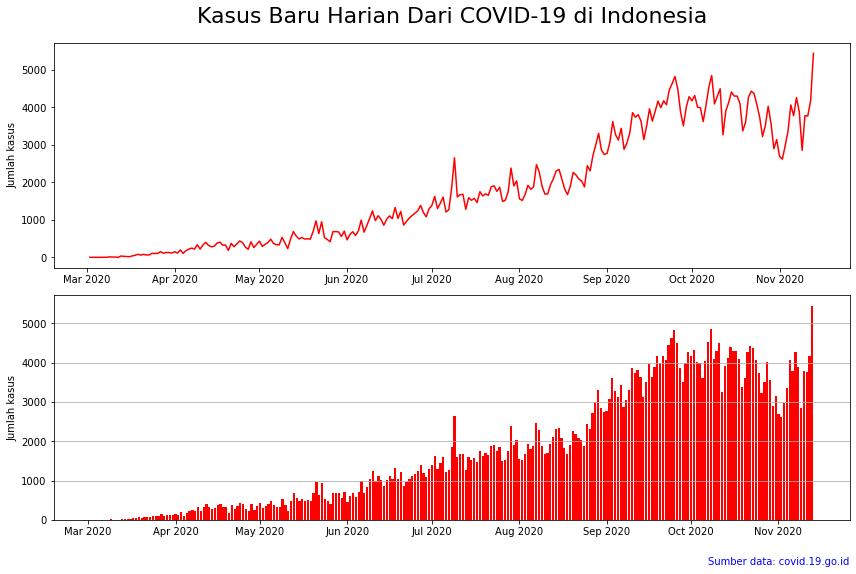

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
ax[0].plot(df['tanggal'], df['kasus_baru'], 'r')
ax[0].set_title('Kasus Baru Harian Dari COVID-19 di Indonesia',pad=20, fontsize=22)
ax[0].set_xlabel('')
ax[0].set_ylabel('Jumlah kasus')
ax[0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))


ax[1].bar(data=df, x='tanggal', height='kasus_baru', color='red')
ax[1].set_xlabel('')
ax[1].set_ylabel('Jumlah kasus')
ax[1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax[1].text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue',ha='right', transform=ax[1].transAxes)
plt.grid(axis='y')
plt.tight_layout()


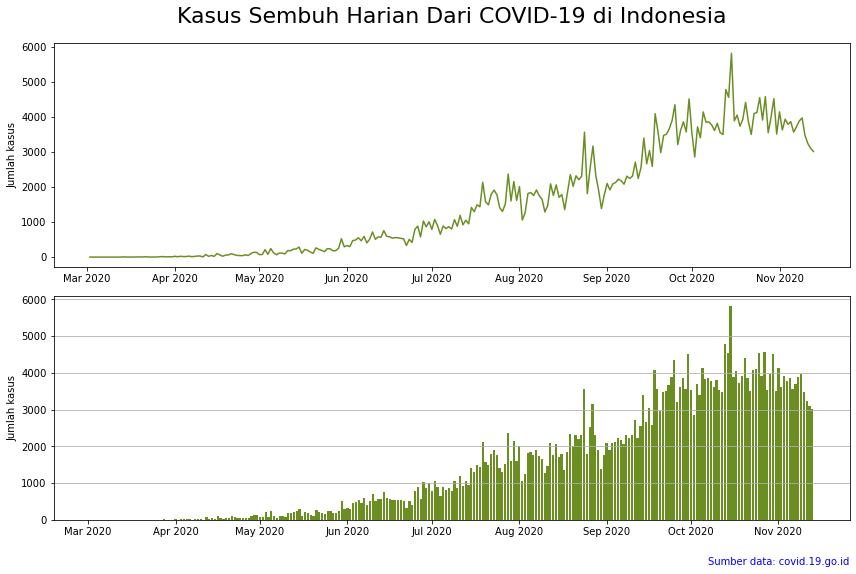

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
ax[0].plot(df['tanggal'], df['sembuh'], 'olivedrab')
ax[0].set_title('Kasus Sembuh Harian Dari COVID-19 di Indonesia',pad=20, fontsize=22)
ax[0].set_xlabel('')
ax[0].set_ylabel('Jumlah kasus')
ax[0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))


ax[1].bar(data=df, x='tanggal', height='sembuh', color='olivedrab')
ax[1].set_xlabel('')
ax[1].set_ylabel('Jumlah kasus')
ax[1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax[1].text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue',ha='right', transform=ax[1].transAxes)
plt.grid(axis='y')
plt.tight_layout()


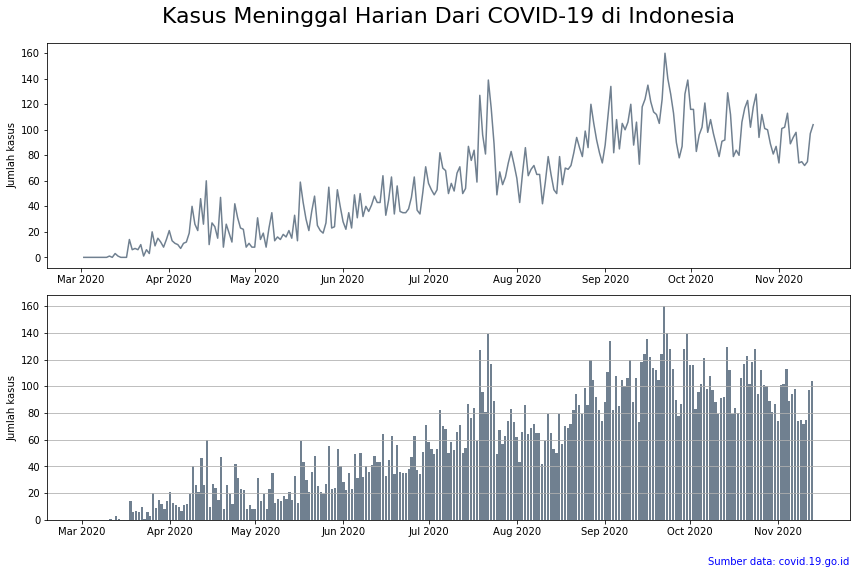

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
ax[0].plot(df['tanggal'], df['meninggal'], 'slategrey')
ax[0].set_title('Kasus Meninggal Harian Dari COVID-19 di Indonesia',pad=20, fontsize=22)
ax[0].set_xlabel('')
ax[0].set_ylabel('Jumlah kasus')
ax[0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))


ax[1].bar(data=df, x='tanggal', height='meninggal', color='slategrey')
ax[1].set_xlabel('')
ax[1].set_ylabel('Jumlah kasus')
ax[1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax[1].text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue',ha='right', transform=ax[1].transAxes)
plt.grid(axis='y')
plt.tight_layout()


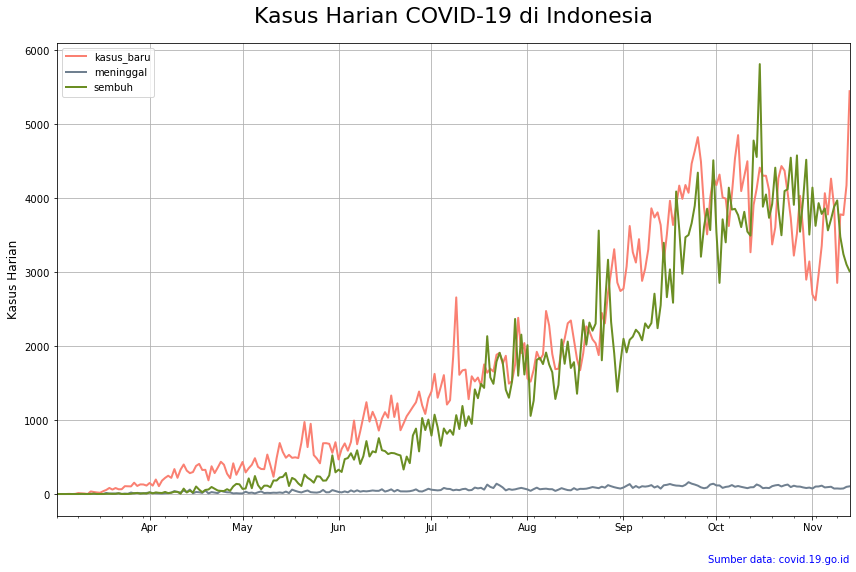

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
df.plot(x='tanggal', kind='line', ax=ax, lw=2, color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Kasus Harian COVID-19 di Indonesia', pad=20, fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Kasus Harian', fontsize=12)
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue', ha='right', transform=ax.transAxes)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.grid()
plt.tight_layout()
plt.show()

## Eksplorasi dalam satuan minggu

In [26]:
df_weekly = (df.set_index('tanggal')[['kasus_baru', 'sembuh', 'meninggal']]
                                   .resample('W')
                                   .sum()
                                   .reset_index())

In [27]:
df_weekly.head()

,tanggal,kasus_baru,sembuh,meninggal
0,2020-03-08,6,0,0
1,2020-03-15,111,8,5
2,2020-03-22,397,21,43
3,2020-03-29,771,35,66
4,2020-04-05,988,100,84


In [28]:
df_weekly['tahun'] = df_weekly['tanggal'].apply(lambda x: x.year)

In [29]:
df_weekly['pekan_ke'] = df_weekly['tanggal'].apply(lambda x: x.weekofyear)

In [30]:
df_weekly = df_weekly[['tahun', 'pekan_ke', 'kasus_baru', 'sembuh', 'meninggal']]

In [31]:
df_weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   tahun       37 non-null     int64
 1   pekan_ke    37 non-null     int64
 2   kasus_baru  37 non-null     int64
 3   sembuh      37 non-null     int64
 4   meninggal   37 non-null     int64
dtypes: int64(5)
memory usage: 1.6 KB


In [32]:
df_weekly.head()

,tahun,pekan_ke,kasus_baru,sembuh,meninggal
0,2020,10,6,0,0
1,2020,11,111,8,5
2,2020,12,397,21,43
3,2020,13,771,35,66
4,2020,14,988,100,84


In [33]:
df_weekly['kasusbaru_pekanlalu'] = df_weekly['kasus_baru'].shift().replace(np.nan, 0).astype(np.int)
df_weekly['kasusbaru_status'] = df_weekly['kasus_baru'] < df_weekly['kasusbaru_pekanlalu']

df_weekly['sembuh_pekanlalu'] = df_weekly['sembuh'].shift().replace(np.nan, 0).astype(np.int)
df_weekly['sembuh_status'] = df_weekly['sembuh'] < df_weekly['sembuh_pekanlalu']

df_weekly['meninggal_pekanlalu'] = df_weekly['meninggal'].shift().replace(np.nan, 0).astype(np.int)
df_weekly['meninggal_status'] = df_weekly['meninggal'] < df_weekly['meninggal_pekanlalu']


df_weekly.head(10)

,tahun,pekan_ke,kasus_baru,sembuh,meninggal,kasusbaru_pekanlalu,kasusbaru_status,sembuh_pekanlalu,sembuh_status,meninggal_pekanlalu,meninggal_status
0,2020,10,6,0,0,0,False,0,False,0,False
1,2020,11,111,8,5,6,False,0,False,0,False
2,2020,12,397,21,43,111,False,8,False,5,False
3,2020,13,771,35,66,397,False,21,False,43,False
4,2020,14,988,100,84,771,False,35,False,66,False
5,2020,15,1968,195,175,988,False,100,False,84,False
6,2020,16,2334,327,209,1968,False,195,False,175,False
7,2020,17,2307,421,161,2334,True,327,False,209,True
8,2020,18,2310,769,102,2307,False,421,False,161,True
9,2020,19,2840,822,128,2310,False,769,False,102,False


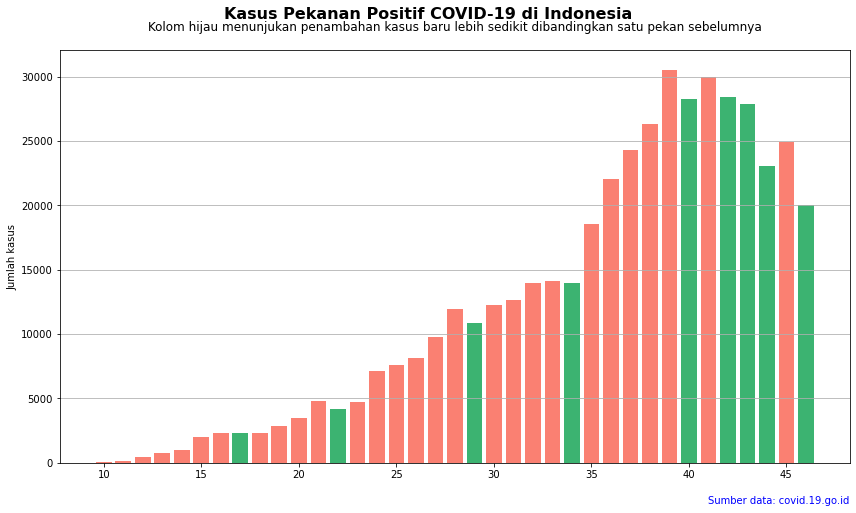

In [34]:
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(data=df_weekly, x='pekan_ke', height='kasus_baru', 
       color=['mediumseagreen' if x is True else 'salmon' for x in df_weekly['kasusbaru_status']]) 
fig.suptitle('Kasus Pekanan Positif COVID-19 di Indonesia', y=1.005, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',pad=20,
             fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue', ha='right', transform=ax.transAxes)

plt.grid(axis='y')
plt.tight_layout()

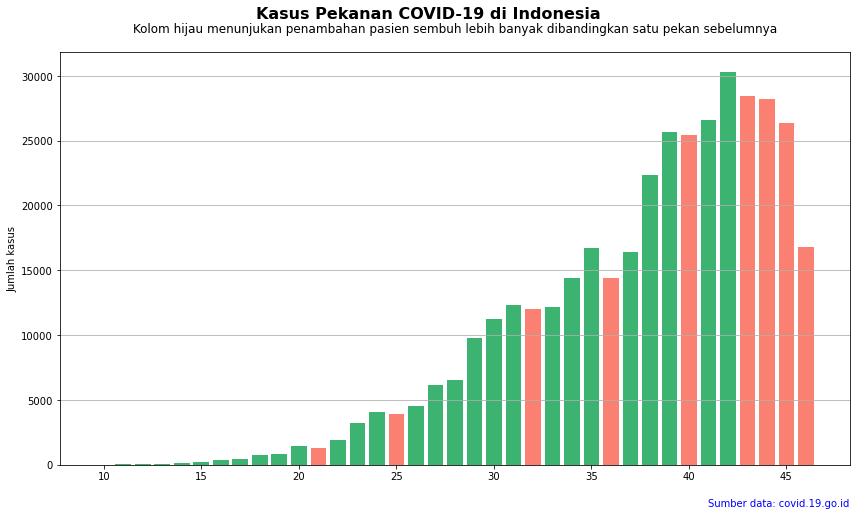

In [35]:
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(data=df_weekly, x='pekan_ke', height='sembuh', 
       color=['salmon' if x is True else 'mediumseagreen' for x in df_weekly['sembuh_status']]) 
fig.suptitle('Kasus Pekanan COVID-19 di Indonesia', y=1.01, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Kolom hijau menunjukan penambahan pasien sembuh lebih banyak dibandingkan satu pekan sebelumnya',pad=20,
             fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue', ha='right', transform=ax.transAxes)

plt.grid(axis='y')
plt.tight_layout()

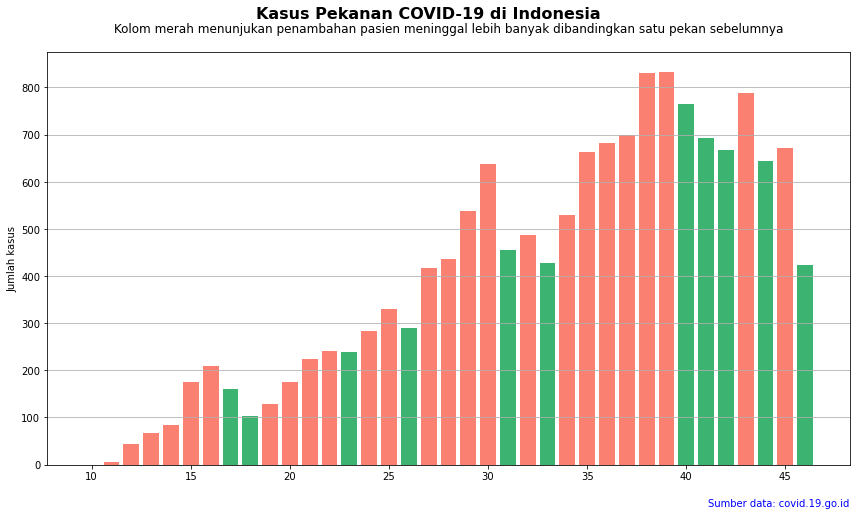

In [36]:
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(data=df_weekly, x='pekan_ke', height='meninggal', 
       color=['mediumseagreen' if x is True else 'salmon' for x in df_weekly['meninggal_status']]) 
fig.suptitle('Kasus Pekanan COVID-19 di Indonesia', y=1.01, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Kolom merah menunjukan penambahan pasien meninggal lebih banyak dibandingkan satu pekan sebelumnya',pad=20,
             fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue', ha='right', transform=ax.transAxes)

plt.grid(axis='y')
plt.tight_layout()

### Jumlah Akumulasi Kasus Covid19 di Indonesia

In [37]:
df_akumulasi = df[['tanggal']].copy()
df_akumulasi['akumulasi_aktif'] = (df['kasus_baru'] - df['sembuh'] - df['meninggal']).cumsum()
df_akumulasi['akumulasi_sembuh'] = df['sembuh'].cumsum()
df_akumulasi['akumulasi_meninggal'] = df['meninggal'].cumsum()
df_akumulasi.tail()

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
252,2020-11-09,53614,372266,14689
253,2020-11-10,53846,375741,14761
254,2020-11-11,54300,378982,14836
255,2020-11-12,55274,382084,14933
256,2020-11-13,57604,385094,15037


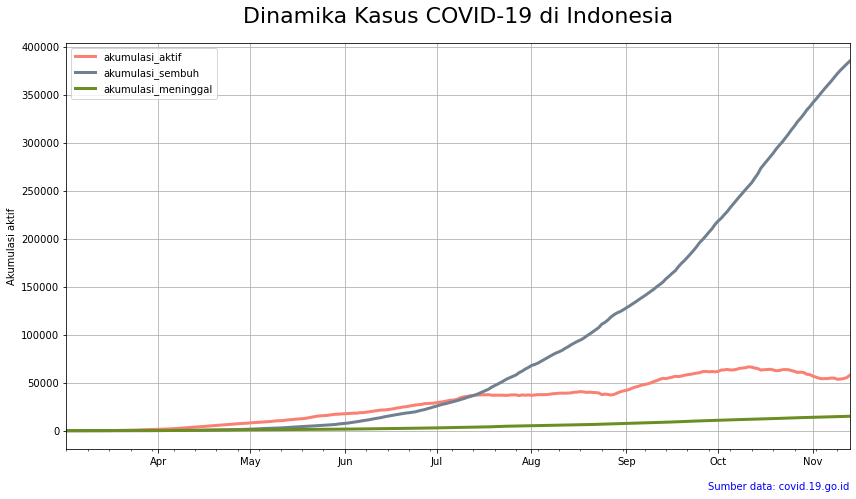

In [38]:
fig, ax = plt.subplots(figsize=(12,7))
df_akumulasi.plot(x='tanggal', kind='line', ax=ax, lw=3, color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Indonesia', pad=20, fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.grid()
plt.tight_layout()
plt.show()